# Multiple Linear Regression

## Bike Sharing Assignment

### Problem Statement:

A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 


In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.




#### *The company wants to know:*

- Which variables are significant in predicting the demand for shared bikes.
- How well those variables describe the bike demands

#### *Business Goal:*

- Develop a model to find the variables which significant the demand for shared bikes with the available independent variables
- It will be used by the management to understand and manipulate the business strategy to meet the demand levels and meet the customer's expectations 

### 1.Reading and Understanding the Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
pd.options.display.max_columns = 100

In [2]:
#Read the dataset csv file using pandas
df = pd.read_csv(r"C:\Users\SANKET\Desktop\Sanket Bhuwad Upgrad\Course II - Machine learning I\Linear Regression\Bike Sharing Assignment\day.csv")
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [3]:
#checking shape of data set
df.shape

(730, 16)

Dataset has 730 rows and 16 columns.

In [4]:
#checking dataframe for null and datatype 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


All columns are either float or integer type.

Except one column is date type.


In [5]:
#Checking statistical data
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


### 2. Check for Null / Missing Values

In [6]:
#Checking for null values if any
df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

There are no null values in the dataset

In [7]:
#changing the column names to understand the data
df = df.rename(columns = {'yr':'year','mnth':'month','weathersit':'weather','hum':'humidity','cnt':'count'})
df.head()

,instant,dteday,season,year,month,holiday,weekday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


### 3. Removing Unwanted Columns

In [8]:
# Droping instant column as it is index column which has nothing to do with target
df.drop(['instant'], axis = 1, inplace = True)

# Dropping dteday as we have already have month and weekday columns to work with
df.drop(['dteday'], axis = 1, inplace = True)

# Dropping casual and registered columns as we have count column which is sum of the both that is the target column

df.drop(['casual'], axis = 1, inplace = True)
df.drop(['registered'], axis = 1, inplace = True)

In [9]:
#inspecting the dataframe again
df.head()

,season,year,month,holiday,weekday,workingday,weather,temp,atemp,humidity,windspeed,count
0,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [10]:
df.season.value_counts()

3    188
2    184
1    180
4    178
Name: season, dtype: int64

In [11]:
df.month.value_counts()

1     62
3     62
5     62
7     62
8     62
10    62
12    62
4     60
6     60
9     60
11    60
2     56
Name: month, dtype: int64

In [12]:
df.weather.value_counts()

1    463
2    246
3     21
Name: weather, dtype: int64

In [13]:
df.weekday.value_counts()

1    105
2    105
0    104
3    104
4    104
5    104
6    104
Name: weekday, dtype: int64

### 

### 4.Handling outliers

In [14]:
#Checking Outliers in Numerical variables
df[['temp','atemp','humidity','windspeed']].describe()

,temp,atemp,humidity,windspeed
count,730.000000,730.000000,730.000000,730.000000
mean,20.319259,23.726322,62.765175,12.763620
std,7.506729,8.150308,14.237589,5.195841
min,2.424346,3.953480,0.000000,1.500244
25%,13.811885,16.889713,52.000000,9.041650
50%,20.465826,24.368225,62.625000,12.125325
75%,26.880615,30.445775,72.989575,15.625589
max,35.328347,42.044800,97.250000,34.000021


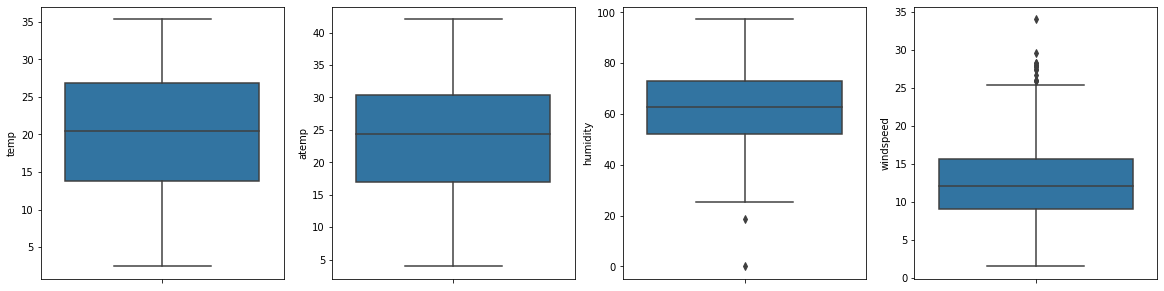

In [15]:
#Drawing boxplots for continous numerical variables 
fig, axes = plt.subplots(1, 4, figsize=(20, 5))

sns.boxplot(ax=axes[0],data=df,y='temp')
sns.boxplot(ax=axes[1],data=df,y='atemp')
sns.boxplot(ax=axes[2],data=df,y='humidity')
sns.boxplot(ax=axes[3],data=df,y='windspeed')

plt.show()

From the plots we can see there are no outliers in the data

### 5. EDA

In [16]:
#Changing int columns to category
df.season.replace({1:'spring',2:'summer',3:'fall',4:'winter'},inplace = True)
df.weather.replace({1:'good',2:'moderate',3:'bad',4:'severe'},inplace = True)
df.month = df.month.replace({1: 'jan',2: 'feb',3: 'mar',4: 'apr',5: 'may',6: 'jun',7: 'jul',8: 'aug',9: 'sept',10: 'oct',11: 'nov',12: 'dec'})
df.weekday = df.weekday.replace({0: 'sun',1: 'mon',2: 'tue',3: 'wed',4: 'thu',5: 'fri',6: 'sat'})

df.head()

,season,year,month,holiday,weekday,workingday,weather,temp,atemp,humidity,windspeed,count
0,spring,0,jan,0,mon,1,moderate,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,jan,0,tue,1,moderate,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,jan,0,wed,1,good,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,jan,0,thu,1,good,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,jan,0,fri,1,good,9.305237,11.46350,43.6957,12.522300,1600


<Figure size 1080x2160 with 0 Axes>

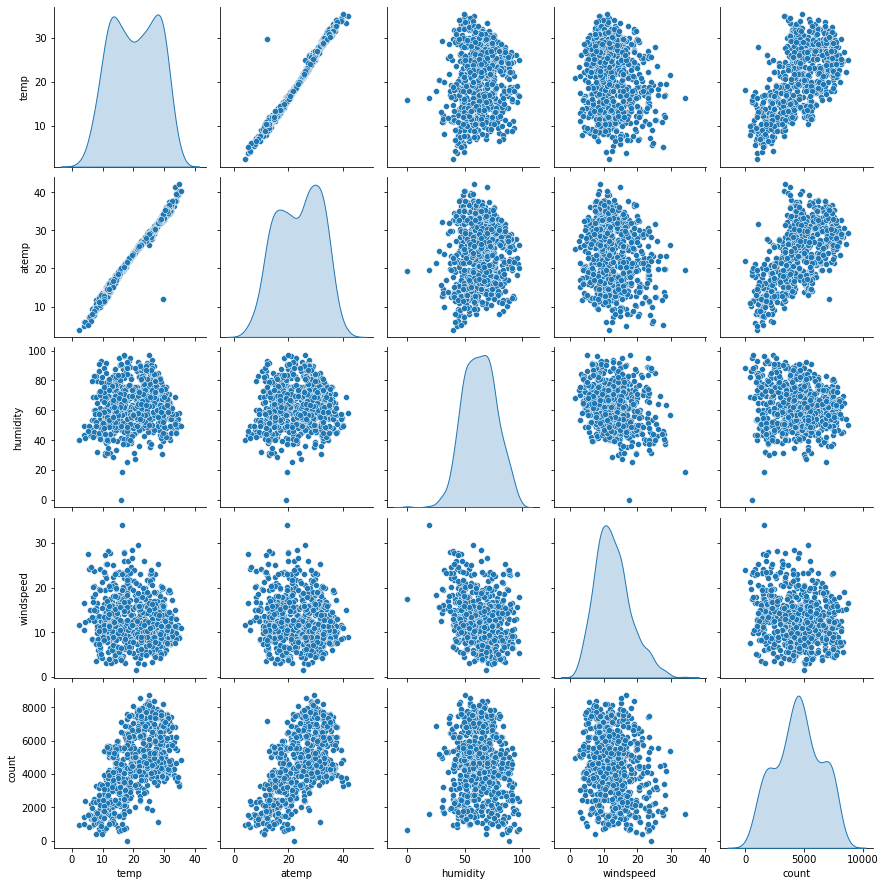

In [17]:
#Pairplots to check Linear Relationship for continous numerical variables
plt.figure(figsize = (15,30))
sns.pairplot(data=df,vars=['temp', 'atemp', 'humidity','windspeed','count'],diag_kind = 'kde')
plt.show()

- temp and atemp are highly co-related with each other
- Looks like temp and atemp has the highest co-relation with target variable count

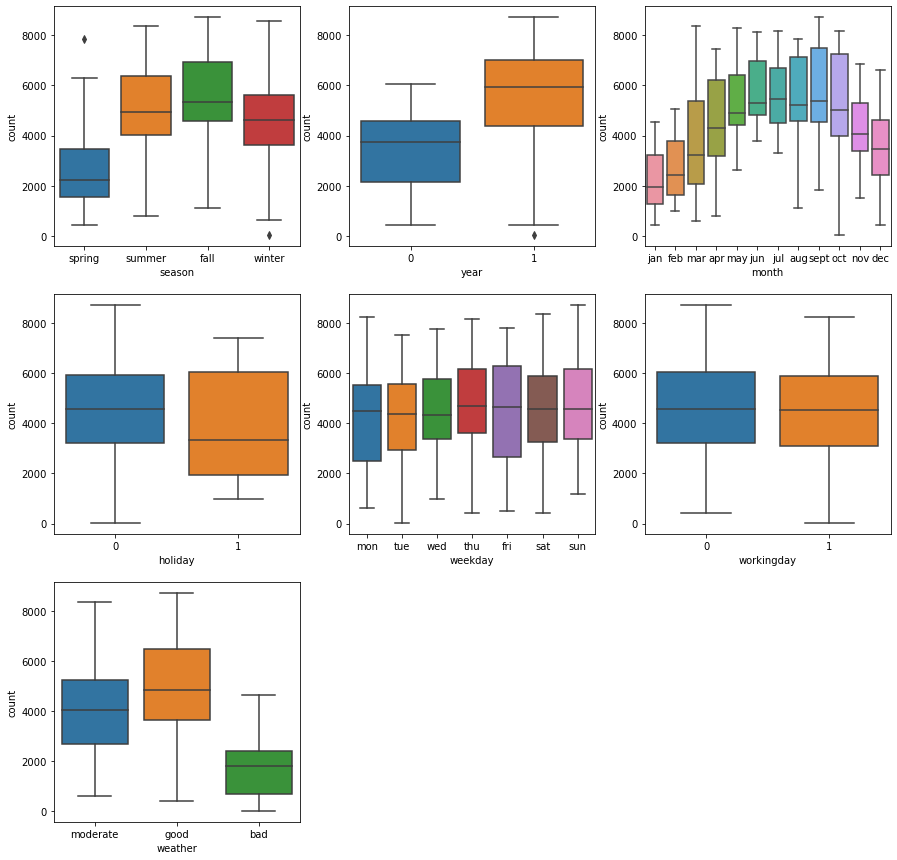

In [18]:
# Analysis of categorical variables with target variable
var = ['season','year','month','holiday','weekday','workingday','weather']
plt.figure(figsize=(15, 15))
for i in enumerate(var):
    plt.subplot(3,3,i[0]+1)
    sns.boxplot(data=df, x=i[1], y='count')
plt.show()


- Season fall has highest demand for shared bikes
- Demand Seems to be increasing in 2019
- Demand is continously growing each month till june.September month has highest demand for shared bikes after that demand is decreasing
- When there is holiday demand is decreased
- On weekdays demand is almost same for each day
- On clear weather demand is highest
- Due to Extreme weather conditions, during beginning and year end demand for shared bikes is less


### Co-relation Matrix

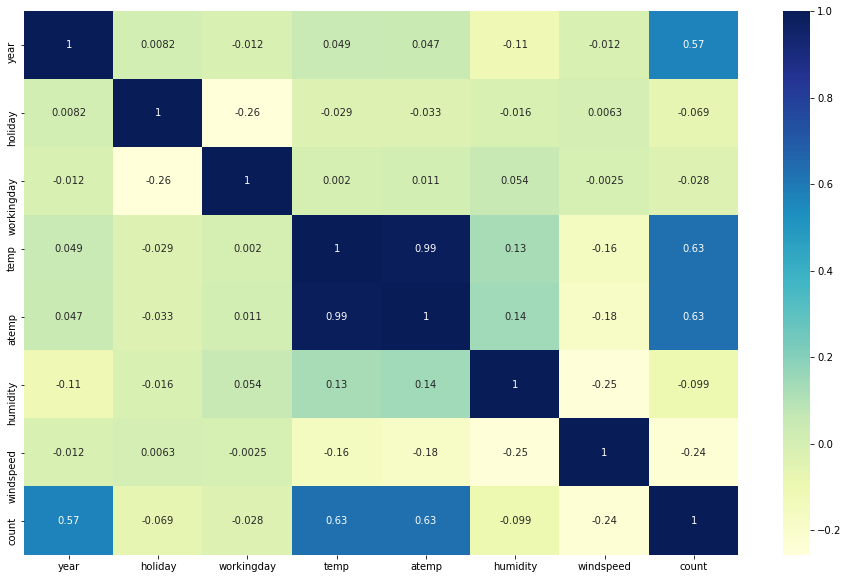

In [19]:
# Let's check the correlation coefficients to see which variables are highly correlated
plt.figure(figsize = (16, 10))
sns.heatmap(df.corr(), annot = True, annot_kws = {'size':10}, cmap="YlGnBu")
plt.show()


From Co-relation heatmap we can see temp and atemp seems to be highly co-related and only variable can be considered for model.We can eliminate it based on VIF and p-value later during model building 

We also see Target variable has a linear relationship with some of the indeptendent variables. Good sign for building a linear regression Model.

### Regression Plot


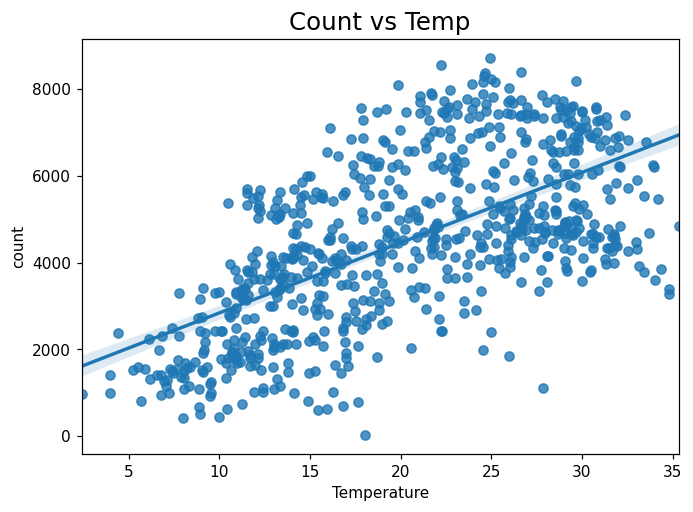

In [20]:
#Checking Regression of target variable with temp
plt.figure(figsize=(7,5),dpi=110)
plt.title("Count vs Temp",fontsize=16)
sns.regplot(data=df,y="count",x="temp")
plt.xlabel("Temperature")
plt.show()

- Demand for shared bikes is positively co-related to temp 
- We can see that count is linearly increasing with increase in temperature

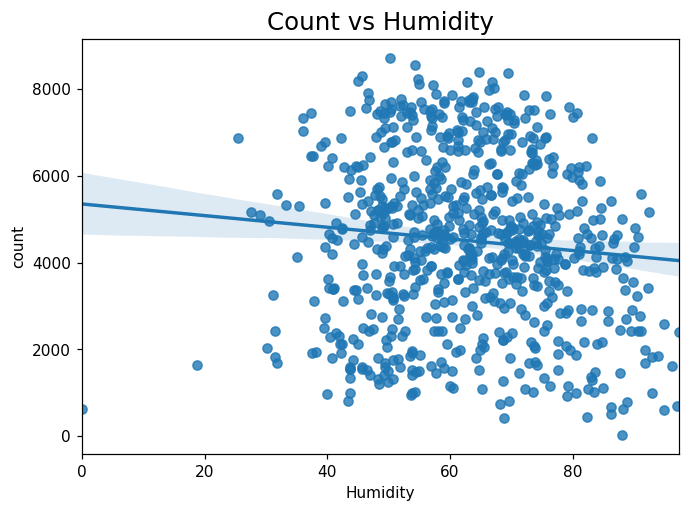

In [21]:
#Checking Regression of target variable with Humidity
plt.figure(figsize=(7,5),dpi=110)
plt.title("Count vs Humidity",fontsize=16)
sns.regplot(data=df,y="count",x="humidity")
plt.xlabel("Humidity")
plt.show()

- Demand for shared bikes is negatively related to humidity
- We can see count is decreasing with increase in humidity

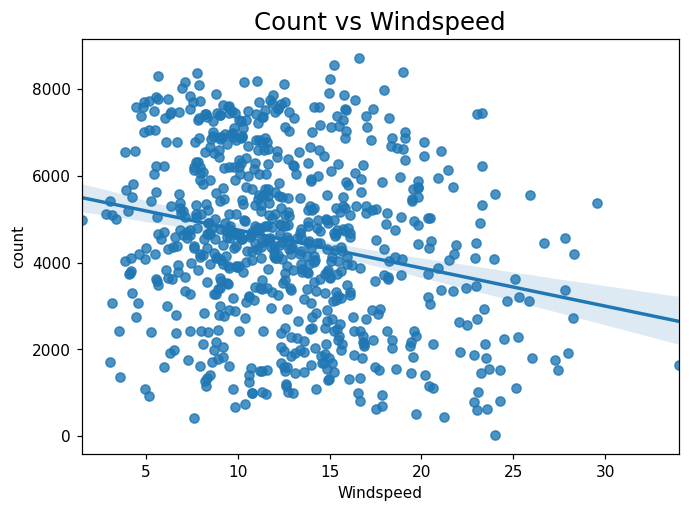

In [22]:
#Checking Regression of target variable with Humidity
plt.figure(figsize=(7,5),dpi=110)
plt.title("Count vs Windspeed",fontsize=16)
sns.regplot(data=df,y="count",x="windspeed")
plt.xlabel("Windspeed")
plt.show()

- Demand for shared bikes is negatively related to windspeed
- We can see decrease in count with increase in windspeed

### 6. Data Preparation for Linear Regression

##### Creating dummy variables for categorical variables

In [23]:
df = pd.get_dummies(data=df,columns=["season","month","weekday"],drop_first=True)
df = pd.get_dummies(data=df,columns=["weather"])

In [24]:
df.columns

Index(['year', 'holiday', 'workingday', 'temp', 'atemp', 'humidity',
       'windspeed', 'count', 'season_spring', 'season_summer', 'season_winter',
       'month_aug', 'month_dec', 'month_feb', 'month_jan', 'month_jul',
       'month_jun', 'month_mar', 'month_may', 'month_nov', 'month_oct',
       'month_sept', 'weekday_mon', 'weekday_sat', 'weekday_sun',
       'weekday_thu', 'weekday_tue', 'weekday_wed', 'weather_bad',
       'weather_good', 'weather_moderate'],
      dtype='object')

In [25]:
df.head()

,year,holiday,workingday,temp,atemp,humidity,windspeed,count,season_spring,season_summer,season_winter,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sept,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weather_bad,weather_good,weather_moderate
0,0,0,1,14.110847,18.18125,80.5833,10.749882,985,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
1,0,0,1,14.902598,17.68695,69.6087,16.652113,801,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [26]:
df.shape

(730, 31)

### 7. Model Building

### Split the Data into Training and Test set


In [27]:
from sklearn.model_selection import train_test_split

In [28]:
#y to contain only target variable
y = df.pop('count')

#X is all our remaining variables
X = df

#Train Test split with 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [29]:
X.head()

,year,holiday,workingday,temp,atemp,humidity,windspeed,season_spring,season_summer,season_winter,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sept,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weather_bad,weather_good,weather_moderate
0,0,0,1,14.110847,18.18125,80.5833,10.749882,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
1,0,0,1,14.902598,17.68695,69.6087,16.652113,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [30]:
X.shape

(730, 30)

In [31]:
# Checking shape and size for train and test
print(X_train.shape)
print(X_test.shape)

(511, 30)
(219, 30)


### Rescaling the Features

In [32]:
#Importing Required Libraries
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.metrics import r2_score
from sklearn.preprocessing import MinMaxScaler

Scaling the continous variables

In [33]:
num_vars = ['temp','atemp','humidity','windspeed']

#Use Normalized scaler to scale
scaler = MinMaxScaler()

#Fit and transform training set only
X_train[num_vars] = scaler.fit_transform(X_train[num_vars])

In [34]:
#Inspecting Statistical Information for Training set after Scaling
X_train.describe()

,year,holiday,workingday,temp,atemp,humidity,windspeed,season_spring,season_summer,season_winter,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sept,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weather_bad,weather_good,weather_moderate
count,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.00000,511.00000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000
mean,0.520548,0.027397,0.698630,0.550874,0.526518,0.654174,0.414873,0.230920,0.258317,0.250489,0.074364,0.074364,0.074364,0.088063,0.091977,0.084149,0.062622,0.091977,0.091977,0.09002,0.09002,0.148728,0.142857,0.133072,0.135029,0.156556,0.133072,0.029354,0.624266,0.346380
std,0.500067,0.163398,0.459303,0.227231,0.212976,0.143648,0.185619,0.421834,0.438138,0.433719,0.262619,0.262619,0.262619,0.283664,0.289276,0.277883,0.242520,0.289276,0.289276,0.28649,0.28649,0.356169,0.350270,0.339986,0.342090,0.363738,0.339986,0.168963,0.484786,0.476282
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.354221,0.353207,0.544598,0.281934,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.575304,0.563297,0.659940,0.384732,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,1.000000,0.000000,1.000000,0.745079,0.698389,0.756977,0.526481,0.000000,1.000000,0.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [35]:
X_train.head()

,year,holiday,workingday,temp,atemp,humidity,windspeed,season_spring,season_summer,season_winter,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sept,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weather_bad,weather_good,weather_moderate
683,1,0,1,0.327133,0.322150,0.639330,0.327101,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
645,1,1,0,0.403972,0.404998,0.731215,0.419004,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1
163,0,0,1,0.717562,0.685963,0.509660,0.708724,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0
360,0,0,1,0.331287,0.326273,0.785745,0.415925,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
640,1,0,1,0.745598,0.682653,0.817947,0.110593,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1


### Building Model using RFE and Automated approch 

In [36]:
#Linear Regression Model using sklearn
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [37]:
#Running RFE with the output number of the variable equal to 15
rfe = RFE(lr,15)
rfe.fit(X_train,y_train)

RFE(estimator=LinearRegression(), n_features_to_select=15)

In [38]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('year', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 10),
 ('temp', True, 1),
 ('atemp', True, 1),
 ('humidity', True, 1),
 ('windspeed', True, 1),
 ('season_spring', True, 1),
 ('season_summer', False, 14),
 ('season_winter', True, 1),
 ('month_aug', False, 7),
 ('month_dec', True, 1),
 ('month_feb', False, 9),
 ('month_jan', False, 8),
 ('month_jul', True, 1),
 ('month_jun', False, 13),
 ('month_mar', True, 1),
 ('month_may', False, 2),
 ('month_nov', True, 1),
 ('month_oct', False, 16),
 ('month_sept', True, 1),
 ('weekday_mon', False, 4),
 ('weekday_sat', False, 11),
 ('weekday_sun', False, 12),
 ('weekday_thu', False, 15),
 ('weekday_tue', False, 6),
 ('weekday_wed', False, 5),
 ('weather_bad', True, 1),
 ('weather_good', True, 1),
 ('weather_moderate', False, 3)]

In [39]:
col = X_train.columns[rfe.support_]
col

Index(['year', 'holiday', 'temp', 'atemp', 'humidity', 'windspeed',
       'season_spring', 'season_winter', 'month_dec', 'month_jul', 'month_mar',
       'month_nov', 'month_sept', 'weather_bad', 'weather_good'],
      dtype='object')

In [40]:
X_train.columns[~rfe.support_]

Index(['workingday', 'season_summer', 'month_aug', 'month_feb', 'month_jan',
       'month_jun', 'month_may', 'month_oct', 'weekday_mon', 'weekday_sat',
       'weekday_sun', 'weekday_thu', 'weekday_tue', 'weekday_wed',
       'weather_moderate'],
      dtype='object')

In [41]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

### Building Linear Model using Stats Model api

#### Model 1 
VIF check


In [42]:
#Checking VIF Values for feature variables
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs

vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values,i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF',ascending=False)
vif

,Features,VIF
3,atemp,1241.42
2,temp,1203.60
4,humidity,20.36
5,windspeed,5.51
14,weather_good,3.28
6,season_spring,3.02
7,season_winter,2.81
0,year,2.09
11,month_nov,1.86
9,month_jul,1.49


In [43]:
import statsmodels.api as sm

# Add a constant
X_train_lr1 = sm.add_constant(X_train_rfe)

#first fit model
lr1 = sm.OLS(y_train,X_train_lr1).fit()

In [44]:
lr1.params

const            2744.854301
year             1965.825273
holiday          -585.004335
temp              516.865254
atemp            3328.161585
humidity        -1381.410144
windspeed        -958.362822
season_spring   -1296.591228
season_winter     738.995540
month_dec        -516.410251
month_jul        -488.168325
month_mar         392.927917
month_nov        -674.082211
month_sept        464.152807
weather_bad     -1338.357763
weather_good      476.611819
dtype: float64

In [45]:
print(lr1.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     173.7
Date:                Thu, 10 Mar 2022   Prob (F-statistic):          4.43e-186
Time:                        20:37:59   Log-Likelihood:                -4123.9
No. Observations:                 511   AIC:                             8280.
Df Residuals:                     495   BIC:                             8348.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          2744.8543    339.816      8.077

#### Model 2 

- Removing the variable 'atemp' based on its high p-value and high VIF

In [46]:
X_train_new = X_train_rfe.drop(["atemp"], axis = 1)

VIF Check

In [47]:
#Checking VIF Values for feature variables
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs

vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values,i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF',ascending=False)
vif

,Features,VIF
2,temp,19.36
3,humidity,19.04
4,windspeed,5.18
13,weather_good,3.20
5,season_spring,3.02
6,season_winter,2.79
0,year,2.08
10,month_nov,1.86
8,month_jul,1.49
7,month_dec,1.38


In [48]:
# Add a constant
X_train_lr2 = sm.add_constant(X_train_new)

#first fit model
lr2 = sm.OLS(y_train,X_train_lr2).fit()

In [49]:
lr2.params

const            2792.370085
year             1966.472160
holiday          -606.102536
temp             3596.820896
humidity        -1323.284472
windspeed       -1041.337141
season_spring   -1316.154649
season_winter     751.503772
month_dec        -511.086417
month_jul        -492.833425
month_mar         413.804580
month_nov        -675.895220
month_sept        445.853830
weather_bad     -1379.753505
weather_good      489.319731
dtype: float64

In [50]:
print(lr2.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     185.4
Date:                Thu, 10 Mar 2022   Prob (F-statistic):          1.03e-186
Time:                        20:37:59   Log-Likelihood:                -4125.1
No. Observations:                 511   AIC:                             8280.
Df Residuals:                     496   BIC:                             8344.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          2792.3701    338.868      8.240

#### Model 3

- Removing variable 'humidity' based on its high VIF value
- We are not dropping 'temp' variable having higher VIF value based on general knowledge temperature can be an important factor in bike rental business

In [51]:
X_train_new = X_train_new.drop(["humidity"], axis = 1)

VIF check

In [52]:
#Checking VIF Values for feature variables
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs

vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values,i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF',ascending=False)
vif

,Features,VIF
2,temp,6.25
3,windspeed,5.03
12,weather_good,2.82
5,season_winter,2.35
0,year,2.08
4,season_spring,1.93
9,month_nov,1.82
7,month_jul,1.43
6,month_dec,1.32
10,month_sept,1.24


In [53]:
# Add a constant
X_train_lr3 = sm.add_constant(X_train_new)

#first fit model
lr3 = sm.OLS(y_train,X_train_lr3).fit()

In [54]:
lr3.params

const            1806.455519
year             2006.270845
holiday          -618.135027
temp             3398.525831
windspeed        -800.485811
season_spring   -1340.663365
season_winter     706.103982
month_dec        -548.999792
month_jul        -445.311725
month_mar         449.530336
month_nov        -675.648448
month_sept        395.555827
weather_bad     -1555.533102
weather_good      700.911938
dtype: float64

In [55]:
print(lr3.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     192.7
Date:                Thu, 10 Mar 2022   Prob (F-statistic):          1.75e-184
Time:                        20:38:00   Log-Likelihood:                -4133.2
No. Observations:                 511   AIC:                             8294.
Df Residuals:                     497   BIC:                             8354.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          1806.4555    235.127      7.683

#### Model 4 

- Removing variable 'windspeed' based on high VIF value 

In [56]:
X_train_new = X_train_new.drop(["windspeed"], axis = 1)

VIF Check

In [57]:
#Checking VIF Values for feature variables
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs

vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values,i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF',ascending=False)
vif

,Features,VIF
2,temp,3.94
11,weather_good,2.80
4,season_winter,2.34
0,year,2.07
8,month_nov,1.79
3,season_spring,1.54
6,month_jul,1.38
5,month_dec,1.32
9,month_sept,1.23
7,month_mar,1.17


In [58]:
# Add a constant
X_train_lr4 = sm.add_constant(X_train_new)

#first fit model
lr4 = sm.OLS(y_train,X_train_lr4).fit()

In [59]:
lr4.params

const            1343.915890
year             2002.065676
holiday          -586.580218
temp             3571.797190
season_spring   -1306.055204
season_winter     784.920752
month_dec        -498.426981
month_jul        -418.798479
month_mar         473.797058
month_nov        -680.158618
month_sept        431.118115
weather_bad     -1672.996605
weather_good      703.349247
dtype: float64

In [60]:
print(lr4.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.829
Model:                            OLS   Adj. R-squared:                  0.825
Method:                 Least Squares   F-statistic:                     201.3
Date:                Thu, 10 Mar 2022   Prob (F-statistic):          2.97e-182
Time:                        20:38:00   Log-Likelihood:                -4141.3
No. Observations:                 511   AIC:                             8309.
Df Residuals:                     498   BIC:                             8364.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          1343.9159    207.649      6.472

#### Model 5

- Removing variable 'holiday' based on its high p-value

In [61]:
X_train_new = X_train_new.drop(["holiday"], axis = 1)

VIF Check

In [62]:
#Checking VIF Values for feature variables
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs

vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values,i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF',ascending=False)
vif

,Features,VIF
1,temp,3.94
10,weather_good,2.80
3,season_winter,2.34
0,year,2.07
7,month_nov,1.79
2,season_spring,1.52
5,month_jul,1.38
4,month_dec,1.32
8,month_sept,1.23
6,month_mar,1.16


In [63]:
# Add a constant
X_train_lr5 = sm.add_constant(X_train_new)

#first fit model
lr5 = sm.OLS(y_train,X_train_lr5).fit()

In [64]:
lr5.params

const            1336.041532
year             1998.911391
temp             3576.699234
season_spring   -1327.673648
season_winter     782.988690
month_dec        -510.578272
month_jul        -422.502967
month_mar         496.048668
month_nov        -692.638621
month_sept        427.459675
weather_bad     -1658.846207
weather_good      698.758292
dtype: float64

In [65]:
print(lr5.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.827
Model:                            OLS   Adj. R-squared:                  0.823
Method:                 Least Squares   F-statistic:                     216.4
Date:                Thu, 10 Mar 2022   Prob (F-statistic):          6.34e-182
Time:                        20:38:00   Log-Likelihood:                -4144.8
No. Observations:                 511   AIC:                             8314.
Df Residuals:                     499   BIC:                             8365.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          1336.0415    208.876      6.396

#### Model 6

- Removing variable 'month_jul' based on its high p-value 

In [66]:
X_train_new = X_train_new.drop(["month_jul"], axis = 1)

VIF Check

In [67]:
#Checking VIF Values for feature variables
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs

vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values,i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF',ascending=False)
vif

,Features,VIF
1,temp,3.40
9,weather_good,2.80
3,season_winter,2.27
0,year,2.07
6,month_nov,1.79
2,season_spring,1.50
4,month_dec,1.32
7,month_sept,1.18
5,month_mar,1.16
8,weather_bad,1.08


In [68]:
# Add a constant
X_train_lr6 = sm.add_constant(X_train_new)

# Create a first fitted model
lr6 = sm.OLS(y_train, X_train_lr6).fit()

In [69]:
# Check the parameters obtained

lr6.params

const            1494.078373
year             1993.141532
temp             3251.133869
season_spring   -1380.115436
season_winter     799.642807
month_dec        -537.689975
month_mar         520.957789
month_nov        -727.844356
month_sept        507.053751
weather_bad     -1697.233834
weather_good      684.415360
dtype: float64

In [70]:
print(lr6.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.824
Model:                            OLS   Adj. R-squared:                  0.820
Method:                 Least Squares   F-statistic:                     233.7
Date:                Thu, 10 Mar 2022   Prob (F-statistic):          2.68e-181
Time:                        20:38:01   Log-Likelihood:                -4149.2
No. Observations:                 511   AIC:                             8320.
Df Residuals:                     500   BIC:                             8367.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          1494.0784    203.218      7.352

#### Model 7 

- Removing variable 'month_dec' based on its High p-value and negative coefficient

In [71]:
X_train_new = X_train_new.drop(["month_dec"], axis = 1)

VIF Check

In [72]:
#Checking VIF Values for feature variables
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs

vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values,i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF',ascending=False)
vif

,Features,VIF
1,temp,3.40
8,weather_good,2.80
0,year,2.06
3,season_winter,1.91
5,month_nov,1.65
2,season_spring,1.43
6,month_sept,1.17
4,month_mar,1.15
7,weather_bad,1.08


In [73]:
# Add a constant
X_train_lr7 = sm.add_constant(X_train_new)

# Create a first fitted model
lr7 = sm.OLS(y_train, X_train_lr7).fit()

In [74]:
# Check the parameters obtained

lr7.params

const            1357.242547
year             1983.589708
temp             3429.821146
season_spring   -1374.342032
season_winter     687.940056
month_mar         579.480326
month_nov        -551.476028
month_sept        546.116080
weather_bad     -1720.300987
weather_good      696.125684
dtype: float64

In [75]:
print(lr7.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.820
Model:                            OLS   Adj. R-squared:                  0.816
Method:                 Least Squares   F-statistic:                     252.8
Date:                Thu, 10 Mar 2022   Prob (F-statistic):          5.66e-180
Time:                        20:38:01   Log-Likelihood:                -4155.2
No. Observations:                 511   AIC:                             8330.
Df Residuals:                     501   BIC:                             8373.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          1357.2425    201.450      6.737

### Insights

This model looks good, as there seems to be VERY LOW Multicollinearity between the predictors and the p-values for all the predictors seems to be significant.Here VIF seems to be almost accepted. p-value for all the features is almost 0.0 and R2 is 0.820 Let us select Model 7 as our final as it has all important statistics high (R-square, Adjusted R-squared and F-statistic)

### 8. Final Model Interpretation

#### Hypothesis Testing

lr7 model coefficient values

- const            1357.242547
- year             1983.589708
- temp             3429.821146
- season_spring   -1374.342032
- season_winter     687.940056
- month_mar         579.480326
- month_nov        -551.476028
- month_sept        546.116080
- weather_bad     -1720.300987
- weather_good      696.125684

From the lr7 model summary, it is evident that all our coefficients are not equal to zerowhich means We **REJECT the NULL HYPOTHESIS**

#### F-Statistics

F-Statistics is used for testing the overall significance of the Model: Higher the F-Statistics, more significant the Model is.

   - F-statistic: 252.8
   - Prob (F-statistic): 5.66e-180

The F-Statistics value of 252.8 (which is greater than 1) and the p-value of '~0.0000' states that the overall model is significant


### 9.Residual Analysis 

In [76]:
y_train_pred = lr7.predict(X_train_lr7)

Text(0.5, 0, 'Errors')

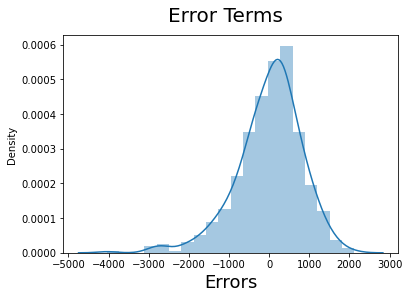

In [77]:
res = y_train-y_train_pred
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((res), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  
plt.xlabel('Errors', fontsize = 18) 

- Error terms are normally distributed with mean zero. Hence our assumption for Linear Regression is valid.

### There is No Multicollinearity between the predictor variables

In [78]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,temp,3.40
8,weather_good,2.80
0,year,2.06
3,season_winter,1.91
5,month_nov,1.65
2,season_spring,1.43
6,month_sept,1.17
4,month_mar,1.15
7,weather_bad,1.08


- From VIF calculations it seems that there is no multicollinearity exist between the predictor variables, all VIF values are below 5

### Making prediction using final model 

#### Applying scaling on numerical variables test sets

In [79]:
num_vars = ['temp','atemp','humidity','windspeed']

#Use Normalized scaler to scale
scaler = MinMaxScaler()

#Fit and transform training set only
X_test[num_vars] = scaler.fit_transform(X_test[num_vars])

In [80]:
#Selecting the variables that were part of final model.
col1=X_train_new.columns
X_test=X_test[col1]
# Adding constant variable to test dataframe
X_test_lr7 = sm.add_constant(X_test)
X_test_lr7.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 219 entries, 468 to 314
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   const          219 non-null    float64
 1   year           219 non-null    int64  
 2   temp           219 non-null    float64
 3   season_spring  219 non-null    uint8  
 4   season_winter  219 non-null    uint8  
 5   month_mar      219 non-null    uint8  
 6   month_nov      219 non-null    uint8  
 7   month_sept     219 non-null    uint8  
 8   weather_bad    219 non-null    uint8  
 9   weather_good   219 non-null    uint8  
dtypes: float64(2), int64(1), uint8(7)
memory usage: 8.3 KB


In [81]:
# Making predictions using the final model (lr7)
y_pred = lr7.predict(X_test_lr7)

### 10. Model Evaluation

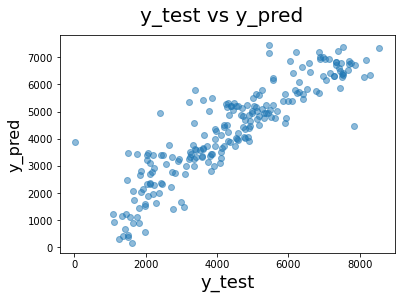

In [82]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred, alpha=.5)
fig.suptitle('y_test vs y_pred', fontsize = 20)              
plt.xlabel('y_test', fontsize = 18)                        
plt.ylabel('y_pred', fontsize = 16) 
plt.show()

### R-Squared value for test predictions

In [83]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.795647298317316

### Adjusted R-Squared value for test predictions

In [84]:
r2 = 0.795647298317316

In [85]:
X_test.shape

(219, 9)

In [86]:
# n is number of rows in X

n = X_test.shape[0]

# Number of features (predictors, p) is the shape along axis 1
p = X_test.shape[1]

# We find the Adjusted R-squared using the formula

adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
adjusted_r2


0.786847421211363

### Final Result Comparison


- Train R^2 :0.820
- Train Adjusted R^2 :0.816
- Test R^2 :0.7956
- Test Adjusted R^2 :0.7868
- This seems to be a really good model that can very well 'Generalize' various datasets.



### Interepretation of results

### Analysing the above model, the comapany should focus on the following features:
- Bike hire count is linearly increasing with increase in temperature
- Company should focus on expanding business during September.
- Based on previous data it is expected to have a boom in number of users once situation comes back to normal,compared to 2018.
- There would be less bookings in bad weather, they could probably use this time to serive the bikes without having business impact.

### Conclusion

Significant variables to predict the demand for shared bikes
- year 
- temp 
- season_spring 
- season_winter 
- month_mar 
- month_nov 
- month_sept 
- weather_bad 
- weather_good 

As per our final Model, the top 3 predictor variables that influences the bike booking are:

- Temperature (temp) - temp is positively correlated with Bike hire
- weather_good  - Users prefer good weather to hire bike
- Year (yr) - Demand for the Sharing bikes is increasing every year.so,year is good predictor variable


Next Features that can also be considered as

- Bike rentals is more for the month of september
- The count of bike sharing is reduce during spring
- The rentals reduce during bad weather